**For this run, we will try to use automation pmdarima**

**run5 use d=0, D=2, seasonal=True, m = 4**

In [1]:
#import all relevant libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib
import seaborn as sns
import sklearn
from scipy import stats

In [2]:
# import dataset
df = pd.read_csv('PCG.csv', index_col='StartDate',parse_dates=True)
df

,Year,Month,month week,WeekNum,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,,,,,
2013-12-30,2013,12,1,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,2014,1,4,2,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2014,1,4,3,2.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-01-20,2014,1,4,4,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-01-27,2014,1,4,5,3.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,2023,12,4,49,0.0,0.0,0.0,0.0,82.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-11,2023,12,4,50,1.0,0.0,1.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-18,2023,12,4,51,0.0,0.0,0.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# DATA CLEANING
# drop unrelated column
# df = df.drop([0])

df = df.drop(df.columns[[0,1,2,3]], axis=1)
df = df.fillna(0)    # fill na cells with 0

# remove first and last row due to their insignificant values
df.drop(df.head(1).index,inplace=True) # drop first row
df.drop(df.tail(1).index,inplace=True) # drop last row

df

,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,
2014-01-06,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-01-20,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-01-27,3.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-02-03,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,2.0,0.0,1.0,0.0,12.0,6.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0
2023-12-04,0.0,0.0,0.0,0.0,82.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-11,1.0,0.0,1.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**From the above plot, we are focusing on model 'PCG-P15' as our desired model, due to its highest average count**

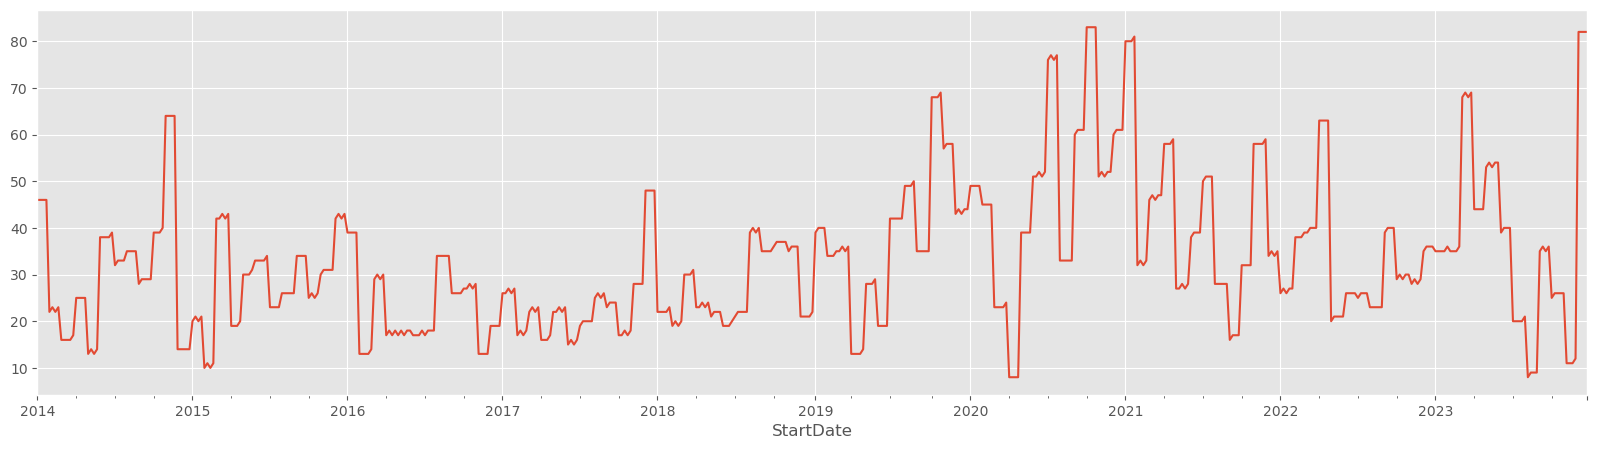

In [4]:
# plot the column 'PCG-P15'

fig, ax1 = plt.subplots(figsize=(20,5))
df['PCG-P15'].plot(ax=ax1)
plt.show()

The 'PCG-P15' plot shows there's no obvious trend and thus is assumed to be stationary.

A few outliers observed from this plot and there's also a possibility of seasonality on a smaller scale for this time-series, which we will further confirmed in the following steps.

In [5]:
# removing outlier using Z-score method for all models

z = np.abs(stats.zscore(df))          # find absolute value of z-score
df_clean = df[(z<3).all(axis=1)]      # only keep rows with z<|3|
df_clean.shape

(438, 13)

In [6]:
df_clean

,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,
2014-01-06,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-20,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-02-03,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
2014-02-10,0.0,0.0,2.0,0.0,23.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
2014-02-17,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,0.0,0.0,1.0,5.0,26.0,3.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0
2023-11-06,1.0,0.0,0.0,0.0,11.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2023-11-13,2.0,0.0,0.0,0.0,11.0,6.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0


After removing the outliers, there's only 438 rows left for the analysis.

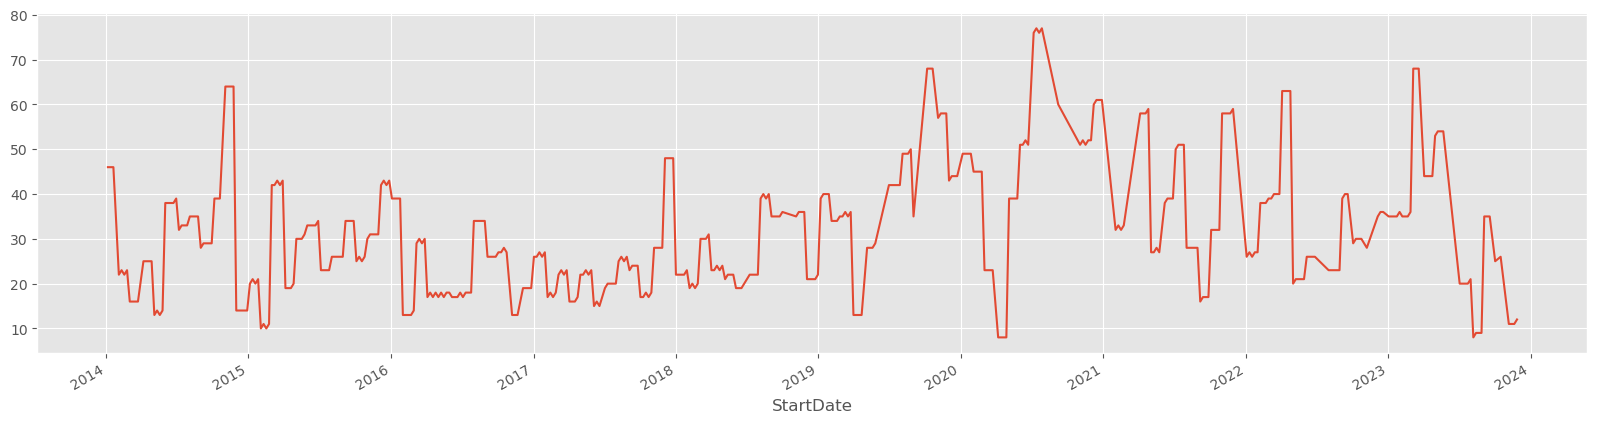

In [7]:
# plot the cleaned 'PCG-P15'

fig, ax1 = plt.subplots(figsize=(20,5))
df_clean['PCG-P15'].plot(ax=ax1)
plt.show()

THE BOX-JENKINS METHOD
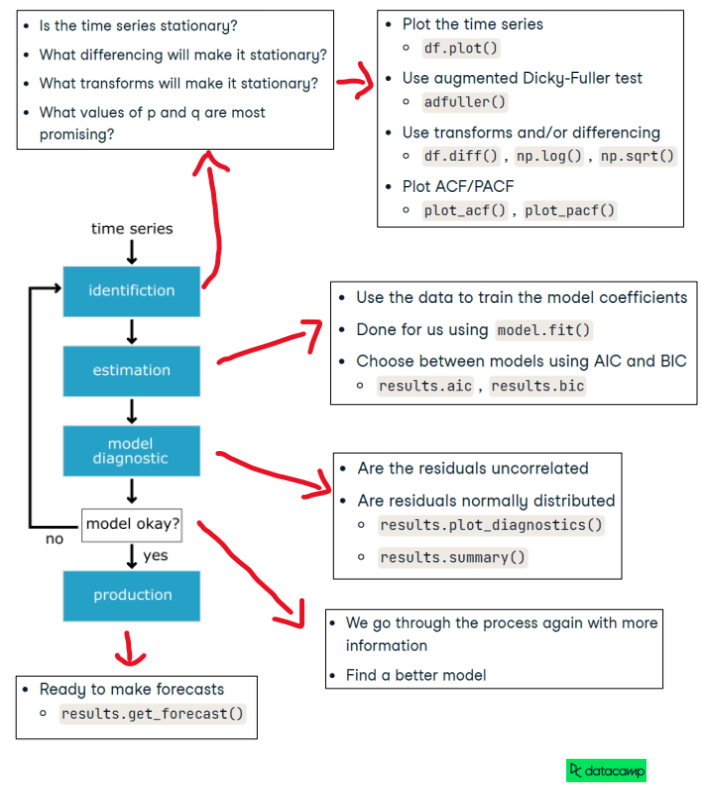

**STEP 1: IDENTIFICATION**

1.1) Test for stationarity

In [8]:
# assign the cleaned selected column 'PCG-P15' into new variable
P15 = df_clean["PCG-P15"]
P15

StartDate
2014-01-06    46.0
2014-01-20    46.0
2014-02-03    22.0
2014-02-10    23.0
2014-02-17    22.0
              ... 
2023-10-16    26.0
2023-11-06    11.0
2023-11-13    11.0
2023-11-20    11.0
2023-11-27    12.0
Name: PCG-P15, Length: 438, dtype: float64

In [9]:
# identify if the time-series is stationary by using Augmented Dickey-Fuller test (ADFT)
# null hypothesis: time-series is non-stationary (p > 0.05)

result_ADF = adfuller(P15)
print(result_ADF)
print('p-value is: ',result_ADF[1])

(-3.1787358143103077, 0.021249001862636688, 18, 419, {'1%': -3.4460536145702383, '5%': -2.868462751982839, '10%': -2.570457599182051}, 2901.681896453503)
p-value is:  0.021249001862636688


Since the p < 0.05, we have to reject the null hypothesis (reject non-stationary).
Thus, our time-series is stationary and no further transformation or differencing is needed (d = 0).

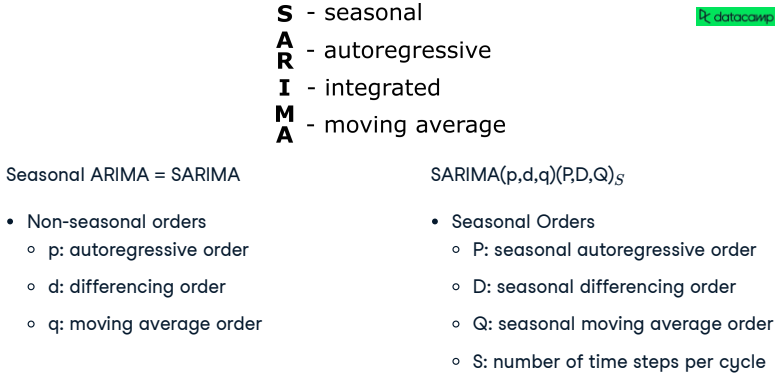

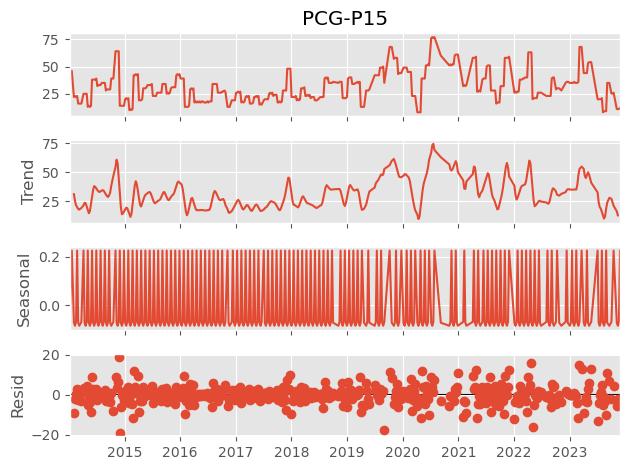

In [10]:
# plot the decomposition of seasonal behavior for the time-series

from statsmodels.tsa.seasonal import seasonal_decompose

decomp_results = seasonal_decompose(P15, period = 4)

# Plot decomposed data
decomp_results.plot()
plt.show()

1.2) Identifying seasonal data using ACF

Despite no obvious trend from the above plot, the seasonal plot however indicates there's exist a seasonal behavior for this time-series.

To confirm this, we are using AutoCorrelation Function (ACF) in order to detect the season cycle.

In [11]:
P15_seasonal = P15 - P15.rolling(4).mean()    # subtract long rolling average over 5 steps
P15_seasonal = P15_seasonal.dropna()          # drop NaN values
P15_seasonal

StartDate
2014-02-10   -11.25
2014-02-17    -6.25
2014-02-24     0.50
2014-03-03    -5.00
2014-03-10    -3.25
              ...  
2023-10-16    -4.25
2023-11-06   -13.25
2023-11-13    -7.25
2023-11-20    -3.75
2023-11-27     0.75
Name: PCG-P15, Length: 435, dtype: float64

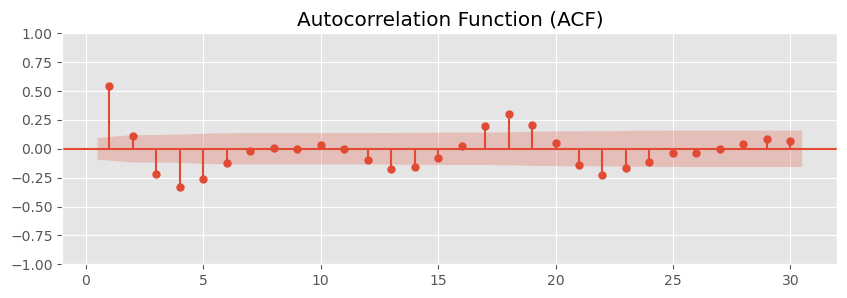

In [12]:
# import ACF/PACF library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,1, figsize=(10,3))

# Plot ACF
plot_acf(P15_seasonal, ax=ax, lags = 30, title='Autocorrelation Function (ACF)', zero=False)
plt.show()

Although the earlier plot of 'PCG-P15' did not show obvious seasonal behavior, its ACF plot however shows a periodic correlaction pattern.

Hence, we will use SARIMA model instead of ARIMA model for this time-series due to its seasonality pattern.